<a href="https://colab.research.google.com/github/jyotidabass/Classification/blob/main/Image%20Enhancement%20using%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RabbearSu/Image-Enhancement-Python.git

Cloning into 'Image-Enhancement-Python'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), done.


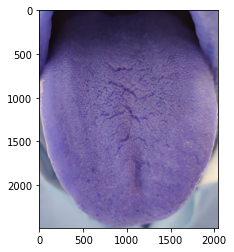

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Image-Enhancement-Python/Tongue Pic. - Gulshan Rai.jpg'

img = cv2.imread(path)
plt.imshow(img)
plt.show()

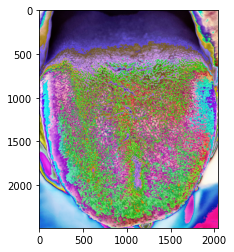

In [17]:

# plt.hist(img.ravel(),256,[0,256])
# plt.show()
def calcGrayHist(I):
    # 计算灰度直方图
    h, w = I.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for i in range(h):
        for j in range(w):
            grayHist[I[i][j]] += 1
    return grayHist

def equalHist(img):
    # 灰度图像矩阵的高、宽
    h, w = img.shape[0], img.shape[1]
    # 第一步：计算灰度直方图
    grayHist = calcGrayHist(img)
    # 第二步：计算累加灰度直方图
    zeroCumuMoment = np.zeros([256], np.uint32)
    for p in range(256):
        if p == 0:
            zeroCumuMoment[p] = grayHist[0]
        else:
            zeroCumuMoment[p] = zeroCumuMoment[p - 1] + grayHist[p]
    # 第三步：根据累加灰度直方图得到输入灰度级和输出灰度级之间的映射关系
    outPut_q = np.zeros([256], np.uint8)
    cofficient = 256.0 / (h * w)
    for p in range(256):
        q = cofficient * float(zeroCumuMoment[p]) - 1
        if q >= 0:
            outPut_q[p] = np.floor(q)
        else:
            outPut_q[p] = 0
    # 第四步：得到直方图均衡化后的图像
    equalHistImage = np.zeros(img.shape, np.uint8)
    for i in range(h):
        for j in range(w):
            equalHistImage[i][j] = outPut_q[img[i][j]]
    return equalHistImage


# 使用自己写的函数实现
equa = equalHist(img)

#plt.hist(equa.ravel(),256,[0,256])
plt.imshow(equa)
plt.show()

Logarithmic transformation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


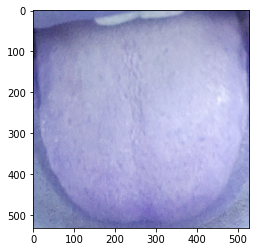

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Image-Enhancement-Python/20210902_164428 - Parikshit Prakash.jpg'

img = cv2.imread(path)

c=1.55
img_trans = c * np.log(1 + img /255)

plt.imshow(img_trans)
plt.show()

Piecewise linear transformation method

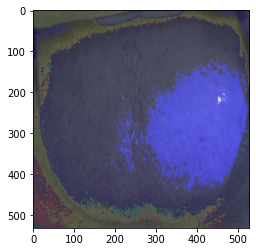

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
path = '/content/Image-Enhancement-Python/20210902_164428 - Parikshit Prakash.jpg'

img = cv2.imread(path)

img = img/255
img = 0.5 * img
img[img<(50/255)] = 2 * img[img<(50/255)]
img[img>(100/255)] = 2 * img[img>(100/255)]


plt.imshow(img)
plt.show()

Powers law transformation

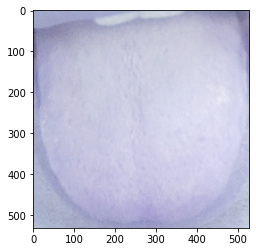

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Image-Enhancement-Python/20210902_164428 - Parikshit Prakash.jpg'

img = cv2.imread(path)

c=1
r=0.4

img_gamma = c * np.power(img/255, r)

plt.imshow(img_gamma)
plt.show()

Thresholding transformation

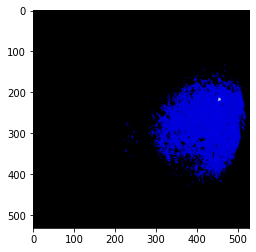

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Image-Enhancement-Python/20210902_164428 - Parikshit Prakash.jpg'

img = cv2.imread(path)

img[img<210] = 0

plt.imshow(img)
plt.show()

In [ ]:
Image Negative

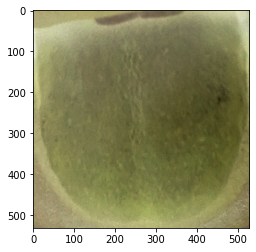

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = '/content/Image-Enhancement-Python/20210902_164428 - Parikshit Prakash.jpg'

img = cv2.imread(path)

img_negative = 256 - img

plt.imshow(img)
plt.imshow(img_negative)
plt.show()